 _Lambda School Data Science Unit 2_
 
 # Classification & Validation Sprint Challenge

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

#### For this Sprint Challenge, you'll predict whether a person's income exceeds $50k/yr, based on census data.

You can read more about the Adult Census Income dataset at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/adult

#### Run this cell to load the data:

In [1]:
import pandas as pd

columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()

## Part 1 — Begin with baselines

Split the data into an **X matrix** (all the features) and **y vector** (the target).

(You _don't_ need to split the data into train and test sets here. You'll be asked to do that at the _end_ of Part 1.)

In [2]:
from sklearn.model_selection import train_test_split

features = df.drop(columns = 'income').columns
target = 'income'

X = df[features]
y = df[target]


What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You can answer this question either with a scikit-learn function or with a pandas function.)

In [3]:
y.value_counts(normalize = True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [4]:
from sklearn.metrics import accuracy_score

      # Taking the Majority option and using that as the prediciton. 
y_pred = [(y.mode()[0])]*len(y)

print("Baseline Accuracy Score: " ,accuracy_score(y, y_pred))

Baseline Accuracy Score:  0.7591904425539756


What **ROC AUC score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of ROC AUC.)

##### The ROC AUC Score is 0.5

The ROC AUC score is a metric used to evaluate **weighted** Classification problems. A ROC AUC of a majority or random guessing baseline will be 0.5. Therefore, for a model to perform better than this baseline, it needs to score higher than a 0.5. Hence, it is an easier metric to interpret for this kind of classification problem than Accuracy Score. 

In this Sprint Challenge, you will use **"Cross-Validation with Independent Test Set"** for your model validaton method.

First, **split the data into `X_train, X_test, y_train, y_test`**. You can include 80% of the data in the train set, and hold out 20% for the test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

## Part 2 — Modeling with Logistic Regression!

- You may do exploratory data analysis and visualization, but it is not required.
- You may **use all the features, or select any features** of your choice, as long as you select at least one numeric feature and one categorical feature.
- **Scale your numeric features**, using any scikit-learn [Scaler](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) of your choice.
- **Encode your categorical features**. You may use any encoding (One-Hot, Ordinal, etc) and any library (category_encoders, scikit-learn, pandas, etc) of your choice.
- You may choose to use a pipeline, but it is not required.
- Use a **Logistic Regression** model.
- Use scikit-learn's [**cross_val_score**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function. For [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules), use **accuracy**.
- **Print your model's cross-validation accuracy score.**

I'll be selective with my features and use visualization later in the challenge when I attempt a 3. Until then, its quick and dirty. 

##### Since I plan on working towards the stretch goal, I am keeping X_test and y_test in a vault until then. Hence I am using X_train and y_train for this section.

In [6]:
import category_encoders as ce
# Import all the things!
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

pipline = make_pipeline(
    ce.OrdinalEncoder(),
    MinMaxScaler(),
    LogisticRegression(solver = 'lbfgs', max_iter = 1000)
)

print('CrossValAccuracy Score: ', cross_val_score(pipline, X_train, y_train, scoring = 'accuracy', cv = 3).mean())




/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


CrossValAccuracy Score:  0.8305053960246398


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Part 3 — Modeling with Tree Ensembles!

Part 3 is the same as Part 2, except this time, use a **Random Forest** or **Gradient Boosting** classifier. You may use scikit-learn, xgboost, or any other library. Then, print your model's cross-validation accuracy score.

In [7]:
# I'm using Random Forest. Gradient Boosting keeps crashing my Kernal. 

from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    MinMaxScaler(),
    RandomForestClassifier(max_depth = 3, n_estimators = 3, random_state = 42)
)

print('CrossValAccuracy Score: ', cross_val_score(pipeline, X_train, y_train, scoring = 'accuracy', cv = 3).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


CrossValAccuracy Score:  0.8182201346143773


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

Calculate accuracy

In [8]:
# True Positive + True Negative / Number Predicted

(36 + 85 ) / (8 + 36 + 58 + 85)

0.6470588235294118

Calculate precision

In [9]:
# True Positive / Predicted Positive

36 / (36 + 58)

0.3829787234042553

Calculate recall

In [10]:
# True Positive / Actually Positive

36 / (36 + 8)

0.8181818181818182

## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Experiment with feature selection, preprocessing, categorical encoding, and hyperparameter optimization, to try improving your cross-validation score.

### Part 3
Which model had the best cross-validation score? Refit this model on the train set and do a final evaluation on the held out test set — what is the test score? 

### Part 4
Calculate F1 score and False Positive Rate. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np

preprocessor = make_pipeline(ce.OrdinalEncoder(), MinMaxScaler())

X = preprocessor.fit_transform(X_train)
X = pd.DataFrame(X, columns = features)
y = y_train

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X, y)

coefficients = pd.Series(model.coef_[0], X.columns)

coefficients.sort_values().plot.barh(color='green', figsize = (12,6))

plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<Figure size 1200x600 with 1 Axes>

Native-Country, and Education seem to have a suspiciously small coefficient. Good candidates for feature engineering. 

Also, the NAN are replaced by ?. I'm going to work around that. 

In [12]:
df.replace(' ?' , np.nan).isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

I'm going to bin native-country into 4 categories:
>- Developed Nations
>- Developing Nations
>- US Citizen
>- US Territory

These are estimates as to the economic development of these countries 25 years ago, in the time frame of this sprint challenge. They are guesses and not empircal.  

It'll be a One-Hot binning. I think that should work well. 

In [13]:
developed = [' South', ' England', ' Canada',' Germany', ' Iran',' Italy', ' Poland',
             ' Portugal',' France',' China', ' Japan',' Yugoslavia',' Scotland',' Greece',
             ' Hong',' Ireland', ' Hungary', ' Holand-Netherlands']

developing = [' Cuba', ' Jamaica', ' India',' Mexico',' Honduras',' Philippines',
              ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',' Taiwan', 
              ' Haiti',' Dominican-Republic',' El-Salvador',' Guatemala',' Peru',
              ' Trinadad&Tobago',' Nicaragua', ' Vietnam',]

US_citizen = [' United-States']

US_territory = [' Puerto-Rico', ' Outlying-US(Guam-USVI-etc)']

df['from_developed'] = df['native-country'].isin(developed)
df['from_developing'] = df['native-country'].isin(developing)
df['from_territory'] = df['native-country'].isin(US_territory)
df['US_citizen'] = df['native-country'].isin(US_citizen)

In [14]:
below_HS = [' 11th',' 9th',' 7th-8th',' 5th-6th', ' 10th', ' 1st-4th',
            ' Preschool', ' 12th']

HS = [' HS-grad', ' Some-college']

Undergrad = [' Bachelors',' Assoc-acdm', ' Assoc-voc']

Advanced = [' Masters', 'Doctorate', ' Prof-school']

df['below_HS'] = df['education'].isin(below_HS)
df['HS'] = df['education'].isin(HS)
df['Undergrad'] = df['education'].isin(Undergrad)
df['Advanced'] = df['education'].isin(Advanced)

In [15]:
features = ['age', 'workclass', 'fnlwgt','marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week','from_developed', 'from_developing', 'from_territory',
       'US_citizen', 'below_HS', 'HS', 'Undergrad', 'Advanced']


X = df[features]
y = df[target]

# A Fresh Train_test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


CrossValAccuracy Score:  0.83050531643406


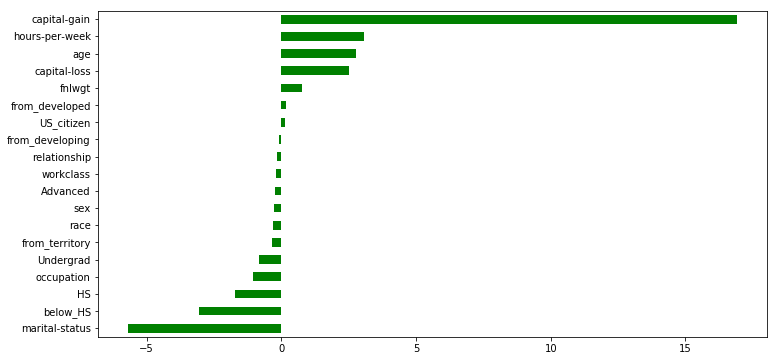

In [16]:
preprocessor = make_pipeline(ce.OrdinalEncoder(), MinMaxScaler())

X = preprocessor.fit_transform(X_train)
X = pd.DataFrame(X, columns = features)
y = y_train

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X, y)

print('CrossValAccuracy Score: ', cross_val_score(model, X, y, scoring = 'accuracy', cv = 3).mean())

coefficients = pd.Series(model.coef_[0], X.columns)

coefficients.sort_values().plot.barh(color='green', figsize = (12,6))

plt.show()

Well, thats pretty much the same!

I'll just try another Classifier. 

In [17]:
# A quick pipeline to mess with hyper-parameters. 

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    MinMaxScaler(),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, random_state = 42)
)

print('CrossValAccuracy Score: ', cross_val_score(pipeline, X_train, y_train, scoring = 'accuracy', cv = 3).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


CrossValAccuracy Score:  0.8456694663891149


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
# Now let's look at all the info using the train_test split. 

from sklearn.metrics import classification_report, confusion_matrix, f1_score

max_depth = 10
max_est = 10

X_train = preprocessor.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features)
X_test = preprocessor.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = features)

model = (RandomForestClassifier(max_depth = max_depth, 
                              n_estimators = max_est, 
                              random_state = 42)
         .fit(X_train,y_train))

print(model, '\n')
   
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = cross_val_predict(model, X_train , y_train, method = 'predict_proba', cv = 5)[:,1]

print(classification_report(y_test, y_pred),'\n')
#print('F-1 Score: ', f1_score(y_test, y_pred),'\n')
print('ROC_AUC Score: ', roc_auc_score(y_train, y_pred_proba),'\n')
print('accuracy', accuracy_score(y_test, y_pred),'\n')
display(pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      4945
        >50K       0.78      0.57      0.66      1568

   micro avg       0.86      0.86      0.86      6513
   macro avg       0.83      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513
 



NameError: name 'roc_auc_score' is not defined

Looks like a big slice of missed predictions were false negatives making my recall go way down. It might be worth playing with the model more to bring the recall down. 